In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import lambdify
from typing import List, Tuple

# Un recorderis de las fórmulas y su significado

![](./imgs/image1.png)


El libro menciona que nos enfocaremos en curvas que estén parametrizadas por longitud de arco, entonces la magnitud de la velocidad es 1, es decir, $|\alpha'(s)|=1$.

- La magnitud de $\alpha'(s)$ es la velocidad de la curva y es un invariante, independiente de la orientación de la curva.

![Alt text](./imgs/image2.png)

- La derivada de $\alpha'(s)$ es la aceleración de la curva y es un invariante, independiente de la orientación de la curva.

In [2]:
# symbolic variables
t = sp.symbols('t')
R = sp.symbols('R', positive=True, real=True)

# symbolic functions
x, y, z, a, da, dda, T, k = sp.symbols('x y z a da dda T k', cls=sp.Function)
da_norma = sp.symbols('da_norma', cls=sp.Function)

Norma euclidiana:

In [3]:
def norm(x):
    return sp.sqrt(np.dot(x, x).simplify())

Círculo de radio $R$ parametrizado como curva plana en 3D

In [4]:
x = R*sp.cos(t)
y = R*sp.sin(t)
z = 0
a = (x, y, z)
a

(R*cos(t), R*sin(t), 0)

Mostremos primero como se comporta esta parametrización en $X$ únicamente.

In [5]:
x.subs(R, 3)

3*cos(t)

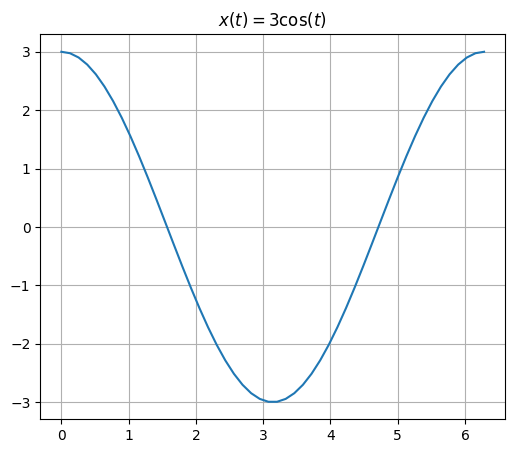

In [6]:
#angles we are going to use
w = np.linspace(0, 2*np.pi)

#turning symbolic functions into numerical functions
X = lambdify(t, x.subs(R, 3))

#plotting
plt.figure(figsize=(6, 5))
plt.plot(w, X(w))
plt.title(r'$x(t) = 3\cos(t)$')
plt.grid()
plt.show()

Ahora sí hagamos la parametrización en 2D como $X$ y $Y$.

In [7]:
w = np.linspace(0, 2*np.pi)
X = lambdify(t, x.subs(R, 3))
Y = lambdify(t, y.subs(R, 3))

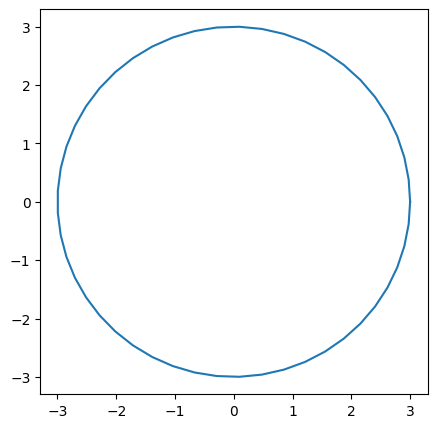

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(X(w), Y(w))
plt.show()

# Vector tangente $\alpha'(t)$

In [9]:
da = (sp.diff(x, t), sp.diff(y, t), sp.diff(z, t))
da

(-R*sin(t), R*cos(t), 0)

¿Se está usando la parametrización longitud de arco? $||\alpha ' (t)|| = ?$

In [10]:
da_norma = norm(da)
da_norma

R

Solo en el caso en que R = 1...

In [11]:
da_norma.subs(R, 1)

1

# Segunda derivada $\alpha''(t)$

In [12]:
dda = (sp.diff(x, t, 2), sp.diff(y, t, 2), sp.diff(z, t, 2))
dda

(-R*cos(t), -R*sin(t), 0)

### Cálculo de la curvatura
### $\kappa(t) = \frac{||\alpha'(t) \times \alpha''(t)||}{||\alpha'(t)||^3}$

![Alt text](./imgs/image3.png)

![Alt text](./imgs/image4.png)

In [13]:
binorm_vec = np.cross(da, dda)
binorm_vec

array([0, 0, R**2*sin(t)**2 + R**2*cos(t)**2], dtype=object)

In [14]:
binom_vec_norm = norm(binorm_vec)
binom_vec_norm

R**2

In [15]:
da_norm = norm(da)
da_norm 

R

In [16]:
k = binom_vec_norm / (da_norm**3)
k

1/R

# Ejercicios

In [17]:
start = 0           # start of integration interval
end   = t           # end of integration interval
u = sp.symbols('u') # integration variable

S = sp.integrate(sp.sin(u**2),(u, start, end))
S

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*t/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))

In [18]:
C = sp.integrate(sp.cos(u**2),(u, start, end))
C

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)*t/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

In [19]:
a = (S, C)
da = (sp.diff(S, t), sp.diff(C, t))
dda = (sp.diff(S, t, 2), sp.diff(C, t, 2))

binorm_vec = np.cross(da, dda)
binom_vec_norm = norm(binorm_vec)

da_norm = norm(da)
k = binom_vec_norm / (da_norm**3)
k = k.simplify()
k

2*sqrt(t**2)

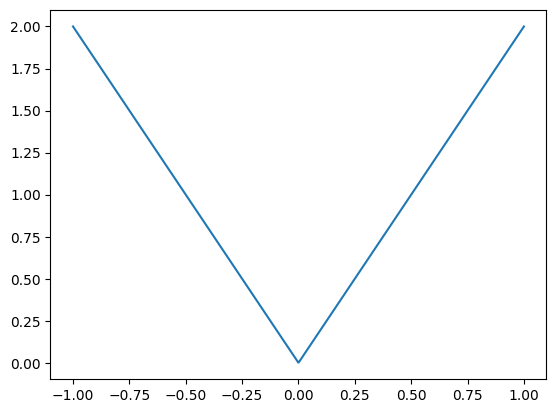

In [20]:
domain = np.linspace(-1, 1, 1000)
x = lambdify(t, S)
y = lambdify(t, C)
curvature = lambdify(t, k)

plt.plot(domain, curvature(domain))

Ahora resumir todo esto en funciones

In [21]:
def get_all_from_parametric_curve(curve: Tuple, var: sp.Symbol):
    """
        Returns a tuple with the following elements:
        - da: first derivative of the curve
        - dda: second derivative of the curve
        - k: curvature of the curve
        - norm_da: norm of the first derivative of the curve
        - norm_dda: norm of the second derivative of the curve

        Input:
        ----------------------------
        - curve: tuple with the parametric curve
        - var: variable of the parametric curve
    """

    da = (sp.diff(curve[0], var), sp.diff(curve[1], var), sp.diff(curve[2], var))
    dda = (sp.diff(curve[0], var, 2), sp.diff(curve[1], var, 2), sp.diff(curve[2], var, 2))
    norm_da = norm(da)
    norm_dda = norm(dda)

    binorm_vec = np.cross(da, dda)
    binom_vec_norm = norm(binorm_vec)
    k = binom_vec_norm / (norm_da**3)

    return da, dda, binorm_vec, k, norm_da, norm_dda, binom_vec_norm

In [22]:
s = sp.symbols('s')
a,b,c = sp.symbols('a,b,c', reals = True, positive = True)

x = a*sp.cos(s/c)
y = a*sp.sin(s/c)
z = b*s/c

alpha = (x, y, z)
alpha

(a*cos(s/c), a*sin(s/c), b*s/c)

In [23]:
da, dda, binom_vec_norm, k, norm_da, norm_dda, binom_vec_norm = get_all_from_parametric_curve(alpha, s)

In [24]:
k

a/(a**2 + b**2)

In [27]:
def get_all_from_parametric_curve_with_normalizations(curve: Tuple, var: sp.Symbol):
    """
        Returns a tuple with the following elements:
        - da: first derivative of the curve
        - dda: second derivative of the curve
        - k: curvature of the curve
        - norm_da: norm of the first derivative of the curve
        - norm_dda: norm of the second derivative of the curve

        Input:
        ----------------------------
        - curve: tuple with the parametric curve
        - var: variable of the parametric curve
    """

    da = (sp.diff(curve[0], var), sp.diff(curve[1], var), sp.diff(curve[2], var))
    dda = (sp.diff(curve[0], var, 2), sp.diff(curve[1], var, 2), sp.diff(curve[2], var, 2))
    norm_da = norm(da)
    norm_dda = norm(dda)

    binorm_vec = np.cross(da, dda)
    binom_vec_norm = norm(binorm_vec)
    k = binom_vec_norm / (norm_da**3)

    unit_da = (da[0]/norm(da), da[1]/norm(da), da[2]/norm(da))
    unit_dda = (dda[0]/norm(dda), dda[1]/norm(dda), dda[2]/norm(dda))
    unit_binorm_vec = (binorm_vec[0]/norm(binorm_vec), binorm_vec[1]/norm(binorm_vec), binorm_vec[2]/norm(binorm_vec))

    return {'da':               da,
            'dda':              dda,
            'binorm_vec':       binorm_vec,
            'k':                k,
            'norm_da':          norm_da,
            'norm_dda':         norm_dda, 
            'binom_vec_norm':   binom_vec_norm, 
            'unit_da':          unit_da,
            'unit_dda':         unit_dda,
            'unit_binorm_vec':  unit_binorm_vec}


In [28]:
get_all_from_parametric_curve_with_normalizations(alpha, s)

{'da': (-a*sin(s/c)/c, a*cos(s/c)/c, b/c),
 'dda': (-a*cos(s/c)/c**2, -a*sin(s/c)/c**2, 0),
 'binorm_vec': array([a*b*sin(s/c)/c**3, -a*b*cos(s/c)/c**3,
        a**2*sin(s/c)**2/c**3 + a**2*cos(s/c)**2/c**3], dtype=object),
 'k': a/(a**2 + b**2),
 'norm_da': sqrt(a**2 + b**2)/c,
 'norm_dda': a/c**2,
 'binom_vec_norm': a*sqrt(a**2 + b**2)/c**3,
 'unit_da': (-a*sin(s/c)/sqrt(a**2 + b**2),
  a*cos(s/c)/sqrt(a**2 + b**2),
  b/sqrt(a**2 + b**2)),
 'unit_dda': (-cos(s/c), -sin(s/c), 0),
 'unit_binorm_vec': (b*sin(s/c)/sqrt(a**2 + b**2),
  -b*cos(s/c)/sqrt(a**2 + b**2),
  c**3*(a**2*sin(s/c)**2/c**3 + a**2*cos(s/c)**2/c**3)/(a*sqrt(a**2 + b**2)))}